<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/PyCaret_clasificacion_01_Tarea_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

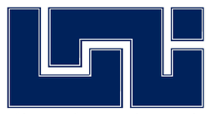

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Iranzuegi López, Luis Ángel
~~~

# **Tarea Modelos Supervisados**

# **Modelo de Clasificación**: <font color="#0A66C2"><h10>**PyCaret** <font> 

# **Carga de librerías necesarias**

## <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## <font color="#333F49">**Para el modelado inicial, base**<font>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## <font color="#333F49">**Para los gráficos** <font>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

## <font color="#333F49">**Para serializar: grabar y recuperar los modelos entrenados** <font>

In [ ]:
import pickle 
import os

## <font color="#333F49">**Para las alertas** <font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**Análisis Exploratorio de los Datos y Preprocesamiento de Datos**

## <font color="#333F49">**Descripción del set de datos** <font>

Los $datos^1$ están relacionados con campañas de marketing directo de una institución bancaria portuguesa.

Las campañas de marketing se han basado en llamadas telefónicas. A menudo, ha sido necesario más de un contacto con el mismo cliente, clienta para poder detectar si estaba (o no) interesado en la contratación  de un producto (depósito a plazo bancario).

<font color="#666666">
<h10>
 (1) Fuente: S. Moro, R. Laureano y P. Cortez. Uso de la minería de datos para el marketing directo bancario: una aplicación de la metodología CRISP-DM
</font>

[Uso de la minería de datos para el marketing directo bancario]( http://repositorium.sdum.uminho.pt/handle/1822/14838)



**Objetivo:** 

Definir un modelo que pueda explicar el éxito de un contacto, es decir, si el o la clienta suscribe el depósito. 

Aumentar la eficacia de la campaña al identificar las principales características que afectan al éxito, ayudando a una mejor gestión de los recursos disponibles (por ejemplo, el esfuerzo humano en llamadas telefónicas, tiempo) y la selección de un conjunto de clientes, clientas potenciales
compradoras.



El dataframe original contiene 17 variables y 45211 observaciones.

Tras realizar un **Ánalisis Exploratorio de los Datos (EDA)** del mismo, resulta un dataframe con 19 variables y 45211 observaciones.

[Análisis Explotarorio de los datos](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/EDA_Tarea_01.ipynb)

Las variables se definen como:
- **edad:** Edad de los y las clientas
- **ocupacion:** Corresponde al tipo de trabajo de los y las clientas
- **estadocivil:** Estado civil de los y las clientas. A tener en cuenta, divorciado, divorciada recoge también las opciones de viudo o viuda
- **educacion:** Nivel de estudios que han alcanzado los y las clientas. <font color="#0A66C2"><h10> Se han depurado las observaciones que tenían un valor de "desconocido"<font> 


- **descubierto:** Si el o la clienta tiene algún no o está al corriente de sus comprosimos creditíceos con la entidad.
- **saldoanual:** saldo anual medio en euros
- **hipoteca:** Si el o la clienta tiene algún crédito hipotecario con la entidad; variable dicotómica
- **préstamo:** Si el o la clienta tiene algún crédito consumo con la entidad; variable dicotómica
- **canalcontacto:** Tipo de contacto; variable categórica. <font color="#0A66C2"><h10> Se han depurado las observaciones que tenían un valor de "desconocido"<font>


- **dia:** Último día de contacto del mes
- **mes:** Último mes de contacto del año
- **duracion:** Duración del último contacto en segundos
- **contactosactuales:** Número de contactos realizados durante la campaña para cada cliente, clienta
- **contactoanterior:** Número de días que pasaron después de que el o la clienta fue contactado por última vez desde una campaña anterior. A tener en cuenta, un valor de -1 significa que el cliente fue no contactado previamente
- **contactos previos:** Número de contactos realizados antes de esta campaña y para este cliente, clienta



- **contrata:** ¿El o la clienta ha suscrito un depósito a plazo? <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 


- **contratanum:** ¿El o la clienta ha suscrito un depósito a plazo?, numérica <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 


- **Anomaly:** Si la observación es categorizado o no como outlier (según modelo iforest, 0.05, implementado con Pycaret)
- **Anomaly_Score:** Score que devuelve el modelo implementado al categorizar cada observación como outlier o no (modelo iforest, 0.05, implementado con Pycaret)

# **Análisis inicial:** <font color="#0A66C2"><h10>clasificación **(PyCaret, con outliers)** <font> 

## <font color="#333F49">**Set de datos con outliers** <font>

Utilizamos el set de datos con la columnas de Anomaly y Anomaly_Score que hemos generado con el análisis de detección de outliers con PyCaret.


In [ ]:
url ='https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/Anomaly_tarea_01.csv'

In [ ]:
datos = pd.read_csv(url)
datos.drop(columns='Unnamed: 0', inplace=True)
datos

edad     ocupacion estadocivil  ... contratanum  Anomaly  Anomaly_Score
0        58    management     married  ...           0        0      -0.085046
1        44    technician      single  ...           0        0      -0.117974
2        33  entrepreneur     married  ...           0        0      -0.086548
3        47   blue-collar     married  ...           0        0      -0.126547
4        33    technician      single  ...           0        0      -0.108942
...     ...           ...         ...  ...         ...      ...            ...
45206    51    technician     married  ...           1        0      -0.041059
45207    71       retired    divorced  ...           1        1       0.015870
45208    72       retired     married  ...           1        1       0.053616
45209    57   blue-collar     married  ...           0        0      -0.054542
45210    37  entrepreneur     married  ...           0        0      -0.042642

[45211 rows x 19 columns]

In [ ]:
datos.shape

(45211, 19)

In [ ]:
datos.size

859009

Dividimos el set de datos en un dataframe con datos para definir el modelo y otro dataframe con datos que el modelo no ha visto, para trabajar con ellos posteriormente, una vez definido el modelo.

In [ ]:
df = datos.sample(frac=0.95, random_state=123)
df_no_vistos = datos.drop(df.index)

In [ ]:
df.reset_index(inplace=True, drop=True)
df_no_vistos.reset_index(inplace=True, drop=True)

In [ ]:
print("Datos para Modelar: " + str(df.shape))
print("Datos no vistos para Predicciones: " + str(df_no_vistos.shape))

Datos para Modelar: (42950, 19)
Datos no vistos para Predicciones: (2261, 19)


## <font color="#333F49"> **Definición del modelo de clasificación** <font>

### Configuración del entorno

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = df,
            target = 'contrata',
            session_id = 123,
            ordinal_features = {'estudios':['primary', 'secondary', 'tertiary'],
                              'ocupacion':['unemployed', 'student', 'housemaid',
                                           'services','blue-collar','admin.',
                                           'technician','entrepreneur',  
                                            'self-employed', 'management','retired']
                              },
            ignore_features = ['contratanum', 'Anomaly', 'Anomaly_Score'],
            normalize = True,
            normalize_method = 'zscore',
            remove_multicollinearity = True, 
            multicollinearity_threshold = 0.75,
            remove_perfect_collinearity = True)

Description             Value
0                               session_id               123
1                                   Target          contrata
2                              Target Type            Binary
3                            Label Encoded     no: 0, yes: 1
4                            Original Data       (42950, 19)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 8
8                         Ordinal Features              True
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (30064, 28)
12                    Transformed Test Set       (12886, 28)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              d3c4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold              0.75
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
get_config('X').columns

Index(['edad', 'ocupacion', 'estudios', 'saldoanual', 'dia', 'duracion',
       'contactosactuales', 'contactoanterior', 'contactosprevios',
       'estadocivil_divorced', 'estadocivil_single', 'descubierto_1',
       'hipoteca_0', 'prestamo_1', 'canalcontacto_others',
       'canalcontacto_telephone', 'mes_apr', 'mes_aug', 'mes_dec', 'mes_feb',
       'mes_jan', 'mes_jul', 'mes_jun', 'mes_mar', 'mes_may', 'mes_nov',
       'mes_oct', 'mes_sep'],
      dtype='object')

### Análisis comparado de los modelos de clasificación

In [ ]:
mejor_modelo = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9043  0.9315  0.4756  0.6130   
gbc          Gradient Boosting Classifier    0.9029  0.9237  0.3918  0.6317   
rf               Random Forest Classifier    0.9023  0.9252  0.3952  0.6262   
et                 Extra Trees Classifier    0.8982  0.9165  0.3375  0.6111   
lr                    Logistic Regression    0.8958  0.8929  0.2770  0.6123   
ada                  Ada Boost Classifier    0.8952  0.9064  0.3401  0.5829   
lda          Linear Discriminant Analysis    0.8939  0.8936  0.3820  0.5634   
knn                K Neighbors Classifier    0.8929  0.8259  0.3166  0.5674   
svm                   SVM - Linear Kernel    0.8926  0.0000  0.1897  0.6211   
ridge                    Ridge Classifier    0.8924  0.0000  0.1762  0.6294   
dummy                    Dummy Classifier    0.8841  0.5000  0.0000  0.0000   
nb                            Naive Bayes    0.8733  0.8192  0.3579  0.4429   
dt               Decision Tree Classifier    0.8720  0.6926  0.4590  0.4491   
qda       Quadratic Discriminant Analysis    0.8021  0.7269  0.4327  0.3743   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.5352  0.4828  0.4879     0.419  
gbc       0.4832  0.4328  0.4481     3.332  
rf        0.4833  0.4325  0.4472     3.011  
et        0.4344  0.3835  0.4043     2.486  
lr        0.3809  0.3328  0.3644     0.663  
ada       0.4291  0.3758  0.3926     1.005  
lda       0.4549  0.3986  0.4080     0.142  
knn       0.4062  0.3525  0.3708     3.559  
svm       0.2829  0.2442  0.2967     0.202  
ridge     0.2750  0.2363  0.2934     0.048  
dummy     0.0000  0.0000  0.0000     0.036  
nb        0.3955  0.3257  0.3282     0.049  
dt        0.4537  0.3813  0.3814     0.217  
qda       0.3448  0.2516  0.2775     0.079

### Creación y optimización del modelo

In [ ]:
rf = create_model ('rf')
print(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9012  0.9167  0.4097  0.6111  0.4906  0.4382  0.4490
1       0.8979  0.9276  0.4069  0.5868  0.4805  0.4260  0.4348
2       0.9062  0.9186  0.4212  0.6476  0.5104  0.4611  0.4742
3       0.8979  0.9277  0.4155  0.5847  0.4858  0.4309  0.4386
4       0.9005  0.9185  0.3851  0.6119  0.4727  0.4209  0.4347
5       0.8989  0.9221  0.3305  0.6183  0.4307  0.3808  0.4034
6       0.9115  0.9368  0.4023  0.7071  0.5128  0.4682  0.4908
7       0.8955  0.9260  0.3621  0.5780  0.4452  0.3909  0.4040
8       0.9065  0.9272  0.3621  0.6811  0.4728  0.4267  0.4525
9       0.9069  0.9309  0.4569  0.6360  0.5318  0.4816  0.4897
Mean    0.9023  0.9252  0.3952  0.6262  0.4833  0.4325  0.4472
SD      0.0049  0.0060  0.0343  0.0403  0.0291  0.0303  0.0294

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
tuned_rf_1 = tune_model(rf, optimize = 'Recall')
print(tuned_rf_1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7795  0.8822  0.8625  0.3286  0.4759  0.3700  0.4392
1       0.7902  0.8902  0.8567  0.3398  0.4866  0.3842  0.4492
2       0.7775  0.8716  0.8195  0.3206  0.4609  0.3530  0.4148
3       0.7769  0.8884  0.8711  0.3269  0.4754  0.3688  0.4404
4       0.7871  0.8918  0.8621  0.3363  0.4839  0.3807  0.4478
5       0.7768  0.8799  0.8477  0.3231  0.4679  0.3607  0.4280
6       0.7951  0.8967  0.8736  0.3470  0.4967  0.3968  0.4635
7       0.7841  0.8945  0.8362  0.3296  0.4728  0.3678  0.4309
8       0.7888  0.8945  0.8621  0.3382  0.4858  0.3833  0.4498
9       0.7908  0.8981  0.8621  0.3405  0.4882  0.3864  0.4523
Mean    0.7847  0.8888  0.8553  0.3331  0.4794  0.3752  0.4416
SD      0.0063  0.0080  0.0157  0.0081  0.0102  0.0126  0.0134

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
lightgbm = create_model('lightgbm')
print(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9039  0.9283  0.4957  0.6049  0.5449  0.4917  0.4948
1       0.9039  0.9333  0.4928  0.6056  0.5434  0.4904  0.4936
2       0.9019  0.9225  0.4842  0.5951  0.5340  0.4798  0.4830
3       0.9002  0.9300  0.4613  0.5897  0.5177  0.4630  0.4673
4       0.8982  0.9292  0.4483  0.5778  0.5049  0.4491  0.4536
5       0.9098  0.9332  0.4828  0.6486  0.5535  0.5046  0.5114
6       0.9079  0.9396  0.4598  0.6426  0.5360  0.4864  0.4948
7       0.8989  0.9304  0.4684  0.5780  0.5175  0.4617  0.4649
8       0.9092  0.9351  0.4511  0.6569  0.5349  0.4865  0.4971
9       0.9088  0.9337  0.5115  0.6312  0.5651  0.5148  0.5183
Mean    0.9043  0.9315  0.4756  0.6130  0.5352  0.4828  0.4879
SD      0.0042  0.0043  0.0199  0.0280  0.0171  0.0191  0.0196

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
et = create_model ('et')
print(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8982  0.9074  0.3553  0.6049  0.4477  0.3958  0.4128
1       0.8976  0.9137  0.3496  0.6010  0.4420  0.3900  0.4074
2       0.8982  0.9122  0.3553  0.6049  0.4477  0.3958  0.4128
3       0.8919  0.9167  0.3238  0.5594  0.4102  0.3553  0.3714
4       0.8949  0.9110  0.3305  0.5808  0.4212  0.3682  0.3860
5       0.8919  0.9123  0.2902  0.5642  0.3833  0.3307  0.3527
6       0.9059  0.9305  0.3391  0.6901  0.4547  0.4097  0.4408
7       0.8992  0.9197  0.3190  0.6271  0.4229  0.3740  0.3998
8       0.9012  0.9199  0.3305  0.6425  0.4364  0.3883  0.4142
9       0.9032  0.9220  0.3822  0.6364  0.4776  0.4279  0.4448
Mean    0.8982  0.9165  0.3375  0.6111  0.4344  0.3835  0.4043
SD      0.0043  0.0064  0.0238  0.0375  0.0249  0.0263  0.0271

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [ ]:
blender_specific_1 = blend_models(estimator_list =[tuned_rf_1, lightgbm, et], method ='soft')
print(blender_specific_1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9069  0.9249  0.5186  0.6177  0.5639  0.5122  0.5146
1       0.9049  0.9291  0.5473  0.5987  0.5719  0.5185  0.5191
2       0.9019  0.9204  0.5186  0.5877  0.5510  0.4962  0.4974
3       0.8982  0.9286  0.5043  0.5696  0.5350  0.4781  0.4792
4       0.8989  0.9264  0.5029  0.5719  0.5352  0.4787  0.4799
5       0.9055  0.9282  0.4943  0.6143  0.5478  0.4957  0.4994
6       0.9118  0.9394  0.4914  0.6602  0.5634  0.5156  0.5225
7       0.8999  0.9315  0.4713  0.5836  0.5215  0.4663  0.4696
8       0.9128  0.9340  0.5029  0.6629  0.5719  0.5244  0.5306
9       0.9112  0.9342  0.5776  0.6262  0.6009  0.5510  0.5516
Mean    0.9052  0.9297  0.5129  0.6093  0.5562  0.5037  0.5064
SD      0.0052  0.0051  0.0287  0.0317  0.0219  0.0243  0.0246

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced_subsample',
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0005,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     min_weight_fraction_l

### Visualización del modelo

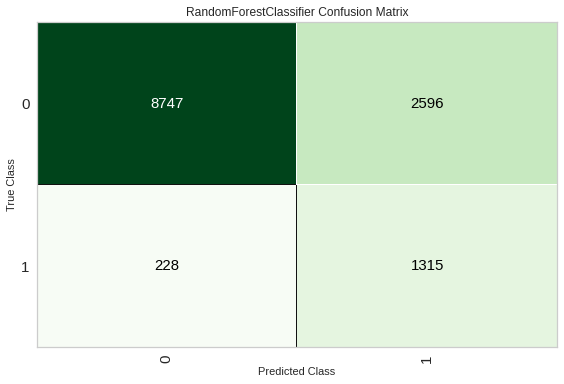

In [ ]:
plot_model(tuned_rf_1, plot = 'confusion_matrix')

### Evaluación del modelo

In [ ]:
evaluate_model (tuned_rf_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predicción

In [ ]:
pred = predict_model(tuned_rf_1, data = df)
pred

edad    ocupacion estadocivil  ... Anomaly_Score  Label   Score
0        56   technician     married  ...     -0.058216     no  0.5055
1        37   management     married  ...     -0.117355     no  0.6518
2        27   unemployed      single  ...     -0.063077     no  0.5869
3        43   management     married  ...     -0.117991     no  0.5962
4        58      retired    divorced  ...     -0.052578     no  0.7471
...     ...          ...         ...  ...           ...    ...     ...
42945    36       admin.     married  ...     -0.076633     no  0.7994
42946    53  blue-collar     married  ...      0.005164    yes  0.6244
42947    30   management     married  ...     -0.092507     no  0.6880
42948    53   technician     married  ...     -0.036619    yes  0.6547
42949    57      retired      single  ...     -0.073496    yes  0.5353

[42950 rows x 21 columns]

A tener en cuenta para cuando realicemos futuras campañas y pongamos en producción el modelo definido

In [ ]:
condicion = [
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.75),
    (pred['Label'] == 'yes') & (pred['Score'] >= 0.60) & (pred['Score']< 0.75),
    ((pred['Label'] == 'yes') & (pred['Score'] < 0.60) | (pred['Label'] == 'no') & (pred['Score'] < 0.60)),
    (pred['Label'] == 'no') & (pred['Score'] >= 0.60)
]
alternativa = ['Nucleo', 'Plasma', 'Periferia', 'No interesante']
pred['perfil'] = np.select(condicion, alternativa, default='Not Specified')


In [ ]:
pred.perfil.value_counts()

No interesante    24129
Periferia         11899
Plasma             5824
Nucleo             1098
Name: perfil, dtype: int64

In [ ]:
from google.colab import files
pred.to_csv('Contrata_modelo_tarea_01.csv') 
files.download('Contrata_modelo_tarea_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Finalización del modelo: inicio fase de implementación

In [ ]:
tuned_rf_1_final = finalize_model(tuned_rf_1)
print(tuned_rf_1_final)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


### Guardar el modelo

In [ ]:
save_model(tuned_rf_1_final,'/content/Contrata_modelo_tarea_01_pred')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['contratanum', 'Anomaly',
                                                        'Anomaly_Score'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='contrata',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                        

In [ ]:
files.download('Contrata_modelo_tarea_01_pred.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Accediendo al modelo guardado

In [ ]:
saved_tuned_rf_1_final = load_model('/content/Contrata_modelo_tarea_01_pred')

Transformation Pipeline and Model Successfully Loaded


### Predecir sobre datos no vistos por el modelo

In [ ]:
dfnv_pred = predict_model(tuned_rf_1_final, data=df_no_vistos)
dfnv_pred.head()

edad    ocupacion estadocivil  ... Anomaly_Score  Label   Score
0    58   technician     married  ...     -0.115321     no  0.8197
1    32  blue-collar      single  ...     -0.067633     no  0.8019
2    53   technician     married  ...     -0.055753    yes  0.5028
3    50   management     married  ...     -0.114635     no  0.8095
4    35  blue-collar      single  ...     -0.035092     no  0.7946

[5 rows x 21 columns]

In [ ]:
condicion = [
    (dfnv_pred['Label'] == 'yes') & (dfnv_pred['Score'] >= 0.75),
    (dfnv_pred['Label'] == 'yes') & (dfnv_pred['Score'] >= 0.60) & (dfnv_pred['Score']< 0.75),
    ((dfnv_pred['Label'] == 'yes') & (dfnv_pred['Score'] < 0.60) | (dfnv_pred['Label'] == 'no') & (dfnv_pred['Score'] < 0.60)),
    (dfnv_pred['Label'] == 'no') & (dfnv_pred['Score'] >= 0.60)
]
alternativa = ['Nucleo', 'Plasma', 'Periferia', 'No interesante']
dfnv_pred['perfil'] = np.select(condicion, alternativa, default='Not Specified')

In [ ]:
dfnv_pred['perfil'].value_counts()

No interesante    1270
Periferia          641
Plasma             279
Nucleo              71
Name: perfil, dtype: int64

In [ ]:
from google.colab import files
dfnv_pred.to_csv('Contrata_modelo_prediccion_tarea_01.csv') 
files.download('Contrata_modelo_prediccion_tarea_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pycaret.utils import check_metric
Accuracy = check_metric(dfnv_pred['contrata'], dfnv_pred['Label'], metric = 'Accuracy')
print(f'Exactitud del modelo: {Accuracy}')

Exactitud del modelo: 0.7731


In [ ]:
Recall = check_metric(dfnv_pred['contrata'], dfnv_pred['Label'], metric = 'Recall')
print(f'Exhaustividad del modelo: {Recall}')

Exhaustividad del modelo: 0.8664


In [ ]:
dfull = pd.concat([pred, dfnv_pred])

In [ ]:
dfull

edad   ocupacion estadocivil  ... Label   Score          perfil
0       56  technician     married  ...    no  0.5055       Periferia
1       37  management     married  ...    no  0.6518  No interesante
2       27  unemployed      single  ...    no  0.5869       Periferia
3       43  management     married  ...    no  0.5962       Periferia
4       58     retired    divorced  ...    no  0.7471  No interesante
...    ...         ...         ...  ...   ...     ...             ...
2256    25     student      single  ...   yes  0.7816          Nucleo
2257    40  management    divorced  ...    no  0.5086       Periferia
2258    35  technician     married  ...   yes  0.6939          Plasma
2259    71     retired    divorced  ...   yes  0.7113          Plasma
2260    72     retired     married  ...   yes  0.8115          Nucleo

[45211 rows x 22 columns]

In [ ]:
from google.colab import files
dfull.to_csv('bank_full_contrata.csv') 
files.download('bank_full_contrata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusiones**: <font color="#0A66C2"><h10>**bucando la exhaustividad** <font> 

El modelo de clasificación, dado el objetivo de maximizar los recursos y, sobre todo, de no perder vinculación por parte de nuestros, nuestras clientas, ha buscado el mejor ratio de **exhaustividad**.

<font color="#0A66C2"><h10>**A nivel de negocio** <font>:
- **Ratio de éxito esperado.** 
En los datos no vistos por el modelo y ajustando al Score de la predicción, obtenemos un  **3,1%**, similar al ratio obtenido en la **anterior campaña (3,3%)**.


- **Exhaustividad del 86,6%.** 


- **Exactitud del 77,3%.**  


- **Perder un potencial cliente, clienta, ¿cuánto nos supone?**  
El modelo propuesto, a la espera de posibles varaciones si se implementan las mejoras en la calidad de los datos, busca minimizar el impacto de perder un cliente, clienta potencial. Es por ello, que proponemos una segmentación en cuatro niveles cara al desarrollo de este tipo de campañas, siendo los más significativos los segmentos: 

    - **núcleo** (segmento que el modelo predice éxito y el score facilitado es igual o superior a la exactitud del modelo)
    - **plasma** (segmento que el modelo predice éxito, pero el score facilitado es inferior a la exactitud del modelo)
